# 1. Introduction

The objective of this assignment is to perform the numerical calculation of the heat equation in one spatial dimension, defined in Equation 1. This equation describes the diffusion of a passive scalar in a field for any number of spatial dimensions.

$\frac{\partial T}{\partial t} = \frac{\partial^2 T}{\partial x^2} $
**Equation 1** 

The domain of this assignment is a simulated wall of a given thickness originall at a given temperature. The wall has a known diffusion of the heat transfer or temperature difference. In the transient simulation, the sides of the wall are suddenly increased to a given temperature, bringing the temperature of the wall up to some value.

**Table 1**
|   Parameter   |   Value   |
|---------------|-----------|
|   ($L$) Thickness of the simulated wall |   0.3 [$m$] |
|   ($T_0$) Initial uniform temperature of the wall | 100 [$K$] |
|   ($\alpha$) Heat diffusivity |   3e-6 [$m^2/s$]    |
|   ($T_w$) Sudden wall temperature |   300 [$K$]   |
|   ($dx$) Spatial mesh spacing |   0.015 [$m$] |



In [1]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt

# Add the directory containing your module to sys.path
module_path = os.path.abspath(os.path.join('..', r"A:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\code\lib" ))
sys.path.append(module_path)

from distributedObjects import *
from distributedFunctions import *


In [2]:
L = 0.300 #[m]
T_0 = 100 #[K]
T_w = 300 #[K]
dx = 0.015 #[m]
alpha = 3e-6 #[m2/s]

x = np.arange( 0 , L+dx , dx )
T = T_0 * np.ones( len( x ) )
T[0] = T_w
T[-1]= T_w


# 2. FTCS


In [3]:
heatEq_FTCS_a = heatEquation( x , T , ( 0 , 30 * 60 ) , alpha = alpha , dt = 20 )
heatEq_FTCS_a.solve()


A:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\code\lib\distributedObjects.py:454: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  cls.u[i+1,:] = spsr.linalg.spsolve( cls.A , b )


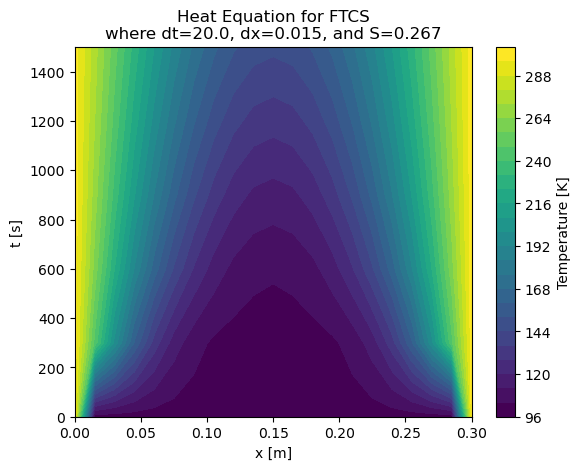

In [4]:
x = heatEq_FTCS_a.x
y = heatEq_FTCS_a.t[np.mod( heatEq_FTCS_a.t , 5 * 60 )==0]
X , Y = np.meshgrid( x , y )

Z = heatEq_FTCS_a.u[np.mod( heatEq_FTCS_a.t , 5 * 60 )==0]

contour = plt.contourf( X , Y , Z , levels = 25 , cmap = 'viridis' , vmin = 100 , vmax = 300 )

plt.title("Heat Equation for FTCS\nwhere dt={x:.1f}, dx={y:.3f}, and S={z:.3f}".format( x = heatEq_FTCS_a.dt , y = heatEq_FTCS_a.dx , z = heatEq_FTCS_a.S ) )
plt.xlabel("x [m]")
plt.ylabel("t [s]")

cbar = plt.colorbar( contour )
cbar.set_label( "Temperature [K]" )

plt.show()


In [5]:
heatEq_FTCS_b = heatEquation( x , T , ( 0 , 30 * 60 ) , alpha = alpha , dt = 60 )
heatEq_FTCS_b.solve()


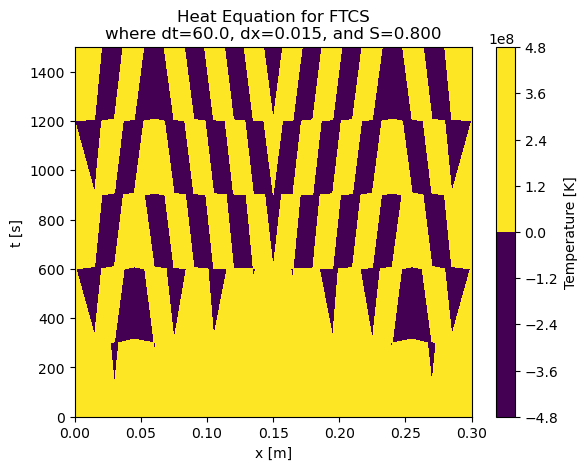

In [6]:
x = heatEq_FTCS_b.x
y = heatEq_FTCS_b.t[np.mod( heatEq_FTCS_b.t , 5 * 60 )==0]
X , Y = np.meshgrid( x , y )

Z = heatEq_FTCS_b.u[np.mod( heatEq_FTCS_b.t , 5 * 60 )==0]

contour = plt.contourf( X , Y , Z , levels = 25 , cmap = 'viridis' , vmin = 100 , vmax = 300 )

plt.title("Heat Equation for FTCS\nwhere dt={x:.1f}, dx={y:.3f}, and S={z:.3f}".format( x = heatEq_FTCS_b.dt , y = heatEq_FTCS_b.dx , z = heatEq_FTCS_b.S ) )
plt.xlabel("x [m]")
plt.ylabel("t [s]")

cbar = plt.colorbar( contour )
cbar.set_label( "Temperature [K]" )

plt.show()


In [7]:
heatEq_FTCS_a.exact( int( 100 ) )
heatEq_FTCS_b.exact( int( 100 ) )

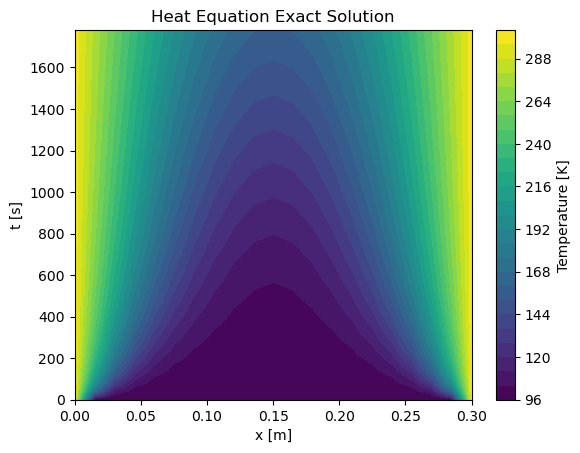

In [8]:
x = heatEq_FTCS_a.x
y = heatEq_FTCS_a.t
X , Y = np.meshgrid( x , y )

Z = heatEq_FTCS_a.u_exact

contour = plt.contourf( X , Y , Z , levels = 25 , cmap = 'viridis' )

plt.title("Heat Equation Exact Solution")
plt.xlabel("x [m]")
plt.ylabel("t [s]")

cbar = plt.colorbar( contour )
cbar.set_label( "Temperature [K]" )

plt.show()


In [9]:
heatEq_FTCS_err = []
dxs = np.logspace( -3 , -1 , num = 5 )
for i , dx in enumerate( dxs ):
    x = np.arange( 0 , L+dx , dx )
    T = T_0 * np.ones( len( x ) )
    T[0] = T_w
    T[-1]= T_w
    
    heatEq_FTCS_err += [heatEquation( x , T , ( 0 , 30 * 60 ) , alpha = alpha , S = 0.25 )]
    heatEq_FTCS_err[i].solve()
    heatEq_FTCS_err[i].exact( 100 )
    heatEq_FTCS_err[i].error()


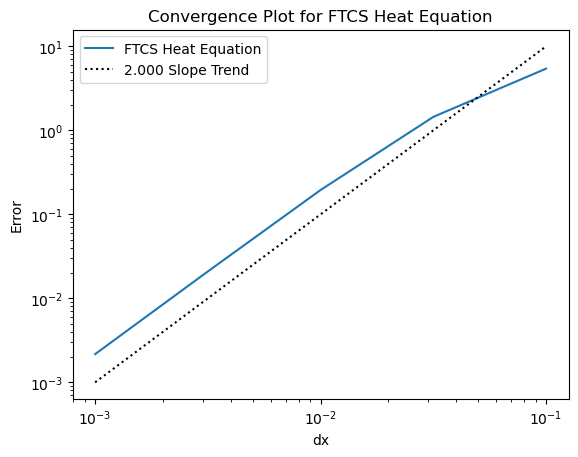

In [10]:
#
# Convergence Plot for FTCS
#
x = np.zeros( len( heatEq_FTCS_err ) )
y = np.zeros( len( heatEq_FTCS_err ) )
for i in range( len( heatEq_FTCS_err ) ):
    x[i] = heatEq_FTCS_err[i].dx
    y[i] = np.sum( heatEq_FTCS_err[i].error_abs ) / np.prod( np.shape( heatEq_FTCS_err[i].error_abs ) )
plt.loglog( x , y , label = "FTCS Heat Equation" )

#
# Trendline
#
P = 2
x_trend = np.logspace(-3,-1,num=10)
y_trend = 1000 * x_trend ** P
plt.loglog( x_trend , y_trend ,':k' , label = "{x:.3f} Slope Trend".format( x = P ) )

plt.legend()
plt.xlabel("dx")
plt.ylabel("Error")
plt.title("Convergence Plot for FTCS Heat Equation")

plt.show()


In [11]:
L = 0.300 #[m]
T_0 = 100 #[K]
T_w = 300 #[K]
dx = 0.015 #[m]
alpha = 3e-6 #[m2/s]

x = np.arange( 0 , L+dx , dx )
T = T_0 * np.ones( len( x ) )
T[0] = T_w
T[-1]= T_w


In [33]:
heatEq_FTCS_c = heatEquation( x , T , ( 0 , 30 * 60 ) , alpha = alpha , S = 1/2 )
heatEq_FTCS_c.solve()
heatEq_FTCS_c.exact( 100 )
heatEq_FTCS_c.error()
np.sum( heatEq_FTCS_c.error_abs )


A:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\code\lib\distributedObjects.py:454: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  cls.u[i+1,:] = spsr.linalg.spsolve( cls.A , b )


np.float64(1043.9236022023397)

In [34]:
heatEq_FTCS_d = heatEquation( x , T , ( 0 , 30 * 60 ) , alpha = alpha , S = 1/6 )
heatEq_FTCS_d.solve()
heatEq_FTCS_d.exact( 100 )
heatEq_FTCS_d.error()
np.sum( heatEq_FTCS_d.error_abs )


A:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\code\lib\distributedObjects.py:454: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  cls.u[i+1,:] = spsr.linalg.spsolve( cls.A , b )


np.float64(1002.0404336266973)

In [14]:
heatEq_FTCS_e = heatEquation( x , T , ( 0 , 30 * 60 ) , alpha = alpha , S = 1 )
heatEq_FTCS_e.solve()


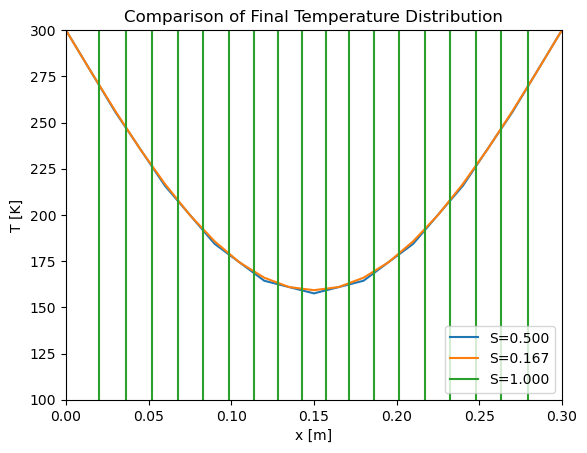

In [15]:
x = heatEq_FTCS_c.x
ys = [ heatEq_FTCS_c.u[-1] , heatEq_FTCS_d.u[-1] , heatEq_FTCS_e.u[-1] ]
Ss = [ heatEq_FTCS_c.S , heatEq_FTCS_d.S , heatEq_FTCS_e.S ]

for i , y in enumerate( ys ):
    plt.plot( x , y , label = "S={x:.3f}".format(x=Ss[i]))

plt.title("Comparison of Final Temperature Distribution")
plt.ylim((100,300))
plt.ylabel("T [K]")
plt.xlim((0,np.max(x)))
plt.xlabel("x [m]")
plt.legend( loc = 'lower right' )


# 3. CN


In [16]:
L = 0.300 #[m]
T_0 = 100 #[K]
T_w = 300 #[K]
dx = 0.015 #[m]
alpha = 3e-6 #[m2/s]

x = np.arange( 0 , L+dx , dx )
T = T_0 * np.ones( len( x ) )
T[0] = T_w
T[-1]= T_w


In [17]:
heatEq_CN_a = heatEquation( x , T , ( 0 , 30 * 60 ) , solver = "CN" , alpha = alpha , dt = 20 )
heatEq_CN_a.solve()


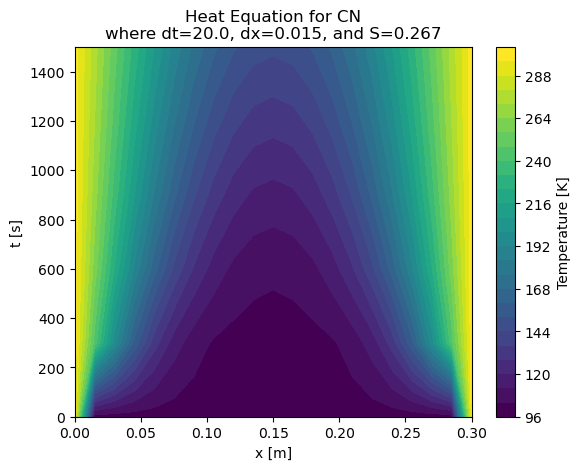

In [18]:
x = heatEq_CN_a.x
y = heatEq_CN_a.t[np.mod( heatEq_CN_a.t , 5 * 60 )==0]
X , Y = np.meshgrid( x , y )

Z = heatEq_CN_a.u[np.mod( heatEq_CN_a.t , 5 * 60 )==0]

contour = plt.contourf( X , Y , Z , levels = 25 , cmap = 'viridis' , vmin = 100 , vmax = 300 )

plt.title("Heat Equation for CN\nwhere dt={x:.1f}, dx={y:.3f}, and S={z:.3f}".format( x = heatEq_CN_a.dt , y = heatEq_CN_a.dx , z = heatEq_CN_a.S ) )
plt.xlabel("x [m]")
plt.ylabel("t [s]")

cbar = plt.colorbar( contour )
cbar.set_label( "Temperature [K]" )

plt.show()


In [19]:
heatEq_CN_b = heatEquation( x , T , ( 0 , 30 * 60 ) , solver = "CN" , alpha = alpha , dt = 60 )
heatEq_CN_b.solve()


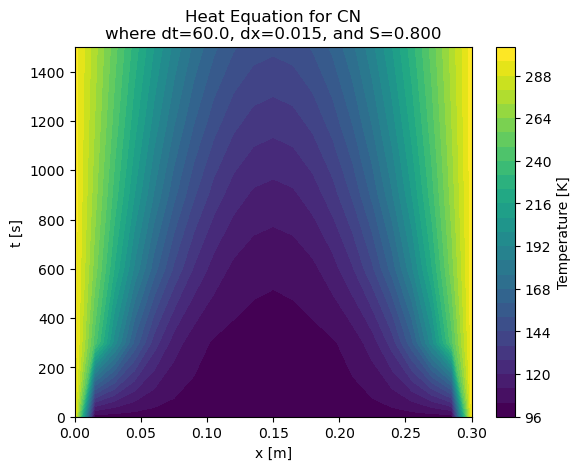

In [20]:
x = heatEq_CN_b.x
y = heatEq_CN_b.t[np.mod( heatEq_CN_b.t , 5 * 60 )==0]
X , Y = np.meshgrid( x , y )

Z = heatEq_CN_b.u[np.mod( heatEq_CN_b.t , 5 * 60 )==0]

contour = plt.contourf( X , Y , Z , levels = 25 , cmap = 'viridis' , vmin = 100 , vmax = 300 )

plt.title("Heat Equation for CN\nwhere dt={x:.1f}, dx={y:.3f}, and S={z:.3f}".format( x = heatEq_CN_b.dt , y = heatEq_CN_b.dx , z = heatEq_CN_b.S ) )
plt.xlabel("x [m]")
plt.ylabel("t [s]")

cbar = plt.colorbar( contour )
cbar.set_label( "Temperature [K]" )

plt.show()


In [21]:
heatEq_CN_a.exact( int( 10 ) )


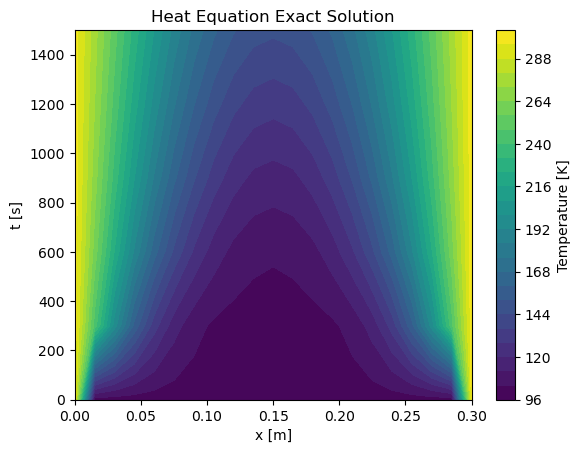

In [22]:
x = heatEq_CN_a.x
y = heatEq_CN_a.t[np.mod( heatEq_CN_a.t , 5 * 60 )==0]
X , Y = np.meshgrid( x , y )

Z = heatEq_CN_a.u_exact[np.mod( heatEq_CN_a.t , 5 * 60 )==0]

contour = plt.contourf( X , Y , Z , levels = 25 , cmap = 'viridis' )

plt.title("Heat Equation Exact Solution")
plt.xlabel("x [m]")
plt.ylabel("t [s]")

cbar = plt.colorbar( contour )
cbar.set_label( "Temperature [K]" )

plt.show()


In [23]:
heatEq_CN_err = []
dxs = np.logspace( -3 , -1 , num = 5 )
for i , dx in enumerate( dxs ):
    x = np.arange( 0 , L+dx , dx )
    T = T_0 * np.ones( len( x ) )
    T[0] = T_w
    T[-1]= T_w
    
    heatEq_CN_err += [heatEquation( x , T , ( 0 , 30 * 60 ) , solver = "CN" , alpha = alpha , S = 0.25 )]
    heatEq_CN_err[i].solve()
    heatEq_CN_err[i].exact( 100 )
    heatEq_CN_err[i].error()


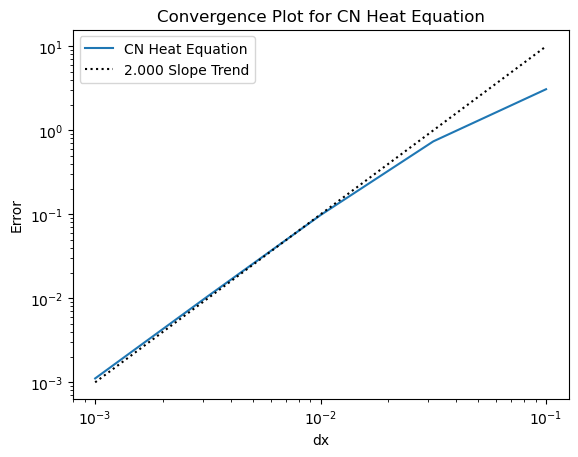

In [24]:
#
# Convergence Plot for CN
#
x = np.zeros( len( heatEq_CN_err ) )
y = np.zeros( len( heatEq_CN_err ) )
for i in range( len( heatEq_CN_err ) ):
    x[i] = heatEq_CN_err[i].dx
    y[i] = np.sum( heatEq_CN_err[i].error_abs ) / np.prod( np.shape( heatEq_CN_err[i].error_abs ) )
plt.loglog( x , y , label = "CN Heat Equation" )

#
# Trendline
#
P = 2
x_trend = np.logspace(-3,-1,num=10)
y_trend = 1000 * x_trend ** P
plt.loglog( x_trend , y_trend ,':k' , label = "{x:.3f} Slope Trend".format( x = P ) )

plt.legend()
plt.xlabel("dx")
plt.ylabel("Error")
plt.title("Convergence Plot for CN Heat Equation")

plt.show()


In [25]:
L = 0.300 #[m]
T_0 = 100 #[K]
T_w = 300 #[K]
dx = 0.015 #[m]
alpha = 3e-6 #[m2/s]

x = np.arange( 0 , L+dx , dx )
T = T_0 * np.ones( len( x ) )
T[0] = T_w
T[-1]= T_w


In [26]:
heatEq_CN_c = heatEquation( x , T , ( 0 , 30 * 60 ) , solver = "CN" , alpha = alpha , S = 1/2 )
heatEq_CN_c.solve()
heatEq_CN_c.exact( 100 )
heatEq_CN_c.error()
np.sum( heatEq_CN_c.error_abs )


In [27]:
heatEq_CN_d = heatEquation( x , T , ( 0 , 30 * 60 ) , solver = "CN" , alpha = alpha , S = 1/6 )
heatEq_CN_d.solve()
heatEq_CN_d.exact( 100 )
heatEq_CN_d.error()
np.sum( heatEq_CN_d.error_abs )


In [28]:
heatEq_CN_e = heatEquation( x , T , ( 0 , 30 * 60 ) , solver = "CN" , alpha = alpha , S = 1 )
heatEq_CN_e.solve()


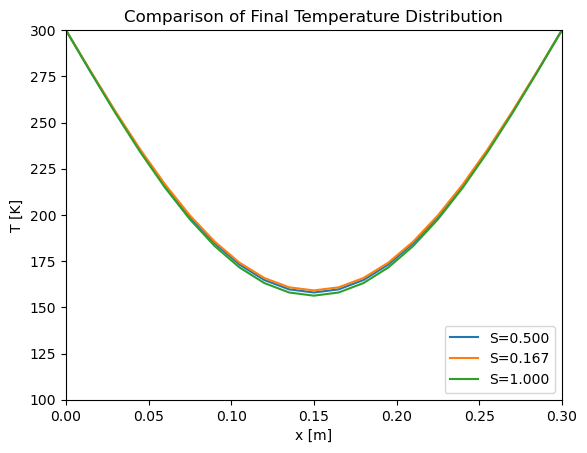

In [29]:
x = heatEq_CN_c.x
ys = [ heatEq_CN_c.u[-1] , heatEq_CN_d.u[-1] , heatEq_CN_e.u[-1] ]
Ss = [ heatEq_CN_c.S , heatEq_CN_d.S , heatEq_CN_e.S ]

for i , y in enumerate( ys ):
    plt.plot( x , y , label = "S={x:.3f}".format(x=Ss[i]))

plt.title("Comparison of Final Temperature Distribution")
plt.ylim((100,300))
plt.ylabel("T [K]")
plt.xlim((0,np.max(x)))
plt.xlabel("x [m]")
plt.legend( loc = 'lower right' )


# 3. DF


In [30]:
Ss = np.logspace( -3 , 3 , num = 7 )

Beta = np.pi * np.linspace( 0 , 1 , num = 10000 )

G_top = np.zeros( ( len( Ss ) , len( Beta ) ) )
G_low = np.zeros( ( len( Ss ) , len( Beta ) ) )
for i , S in enumerate( Ss ):
    G_top[i,...] = ( 2 * S * np.cos( Beta ) + np.sqrt( 1 - 4 * ( S * S ) * ( ( np.sin( Beta ) ) ** 2 ) ) ) / ( 1 + 2 * S )
    G_low[i,...] = ( 2 * S * np.cos( Beta ) - np.sqrt( 1 - 4 * ( S * S ) * ( ( np.sin( Beta ) ) ** 2 ) ) ) / ( 1 + 2 * S )


C:\Users\mtthl\AppData\Local\Temp\ipykernel_17664\2111142857.py:8: RuntimeWarning: invalid value encountered in sqrt
  G_top[i,...] = ( 2 * S * np.cos( Beta ) + np.sqrt( 1 - 4 * ( S * S ) * ( ( np.sin( Beta ) ) ** 2 ) ) ) / ( 1 + 2 * S )
C:\Users\mtthl\AppData\Local\Temp\ipykernel_17664\2111142857.py:9: RuntimeWarning: invalid value encountered in sqrt
  G_low[i,...] = ( 2 * S * np.cos( Beta ) - np.sqrt( 1 - 4 * ( S * S ) * ( ( np.sin( Beta ) ) ** 2 ) ) ) / ( 1 + 2 * S )


C:\Users\mtthl\AppData\Local\Temp\ipykernel_17664\2946735639.py:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((np.log10(1/2),1))


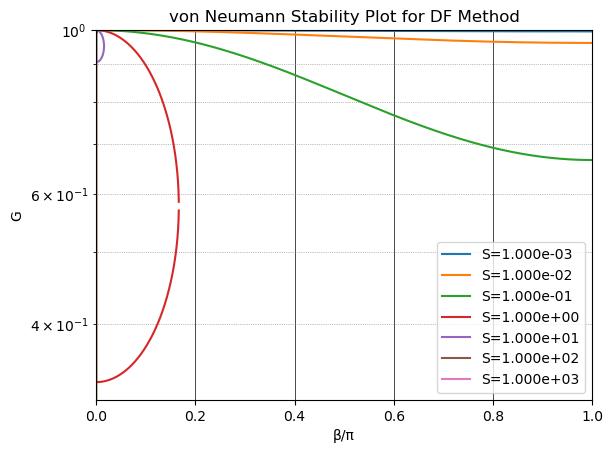

In [31]:
for i , S in enumerate( Ss ):
    G = np.append( G_low[i,::-1] , G_top[i,:] )
    b = np.append( Beta[::-1] , Beta ) / np.pi
    plt.semilogy( b , G , label = "S={x:.3e}".format(x=S))

plt.xlabel("\u03B2/\u03C0")
plt.ylabel("G")
plt.xlim((0,1))
plt.ylim((np.log10(1/2),1))
plt.legend()
plt.title("von Neumann Stability Plot for DF Method")

plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

plt.show()
